In [12]:
from zs6d import ZS6D
import os
import json

with open(os.path.join("./dino_pose_configs/cfg_lmo_inference_bop.json"), "r") as f:
    config = json.load(f)
    

pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'])

Using cache found in /home/philipp/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 13/13 [00:36<00:00,  2.80s/it]


Preparing templates and loading of extractor is done!


running k-means on cuda..


[running kmeans]: 1it [00:00, 187.10it/s, center_shift=0.000000, iteration=1, tol=0.000100]


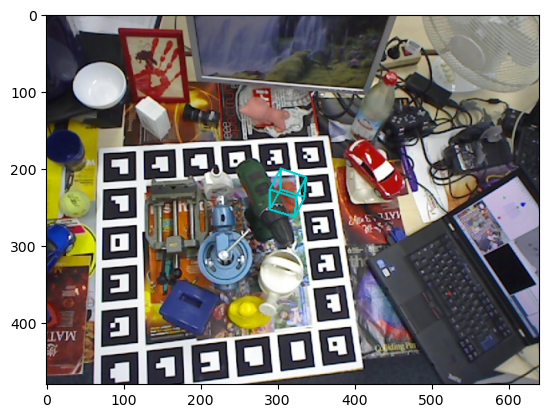

Pose estimation time: 0.2368783950805664
R_est: [[ 0.93644718  0.34912871  0.03429027]
 [ 0.29793471 -0.73989284 -0.60315297]
 [-0.18520689  0.57503716 -0.79688812]]
t_est: [ -24.77813553  -20.3746542  1235.27508136]
running k-means on cuda..


[running kmeans]: 4it [00:00, 55.26it/s, center_shift=0.000000, iteration=4, tol=0.000100]


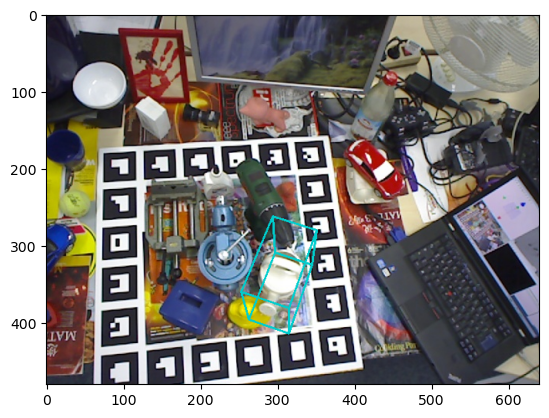

Pose estimation time: 0.5056695938110352
R_est: [[ 0.94708712  0.32052742  0.01697508]
 [ 0.28343069 -0.81031165 -0.51289577]
 [-0.15064206  0.49056824 -0.85828304]]
t_est: [-35.22357927 172.6094639  999.56574214]
running k-means on cuda..


[running kmeans]: 3it [00:00, 79.87it/s, center_shift=0.000000, iteration=3, tol=0.000100]


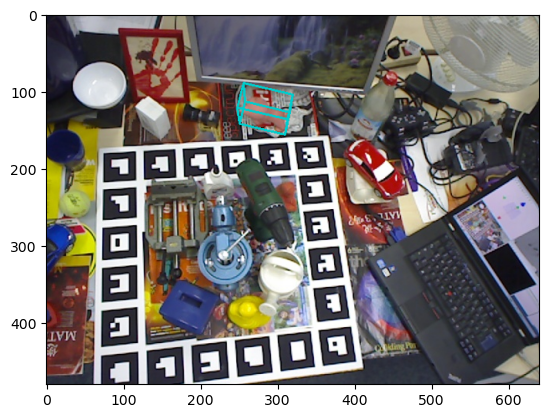

Pose estimation time: 0.3680272102355957
R_est: [[ 0.20736305 -0.97553121  0.07307132]
 [-0.95964489 -0.21735188 -0.17843725]
 [ 0.1899533  -0.03312123 -0.98123429]]
t_est: [ -82.9808095  -238.53118443 1165.55800958]
running k-means on cuda..


[running kmeans]: 5it [00:00, 52.84it/s, center_shift=0.000000, iteration=5, tol=0.000100]


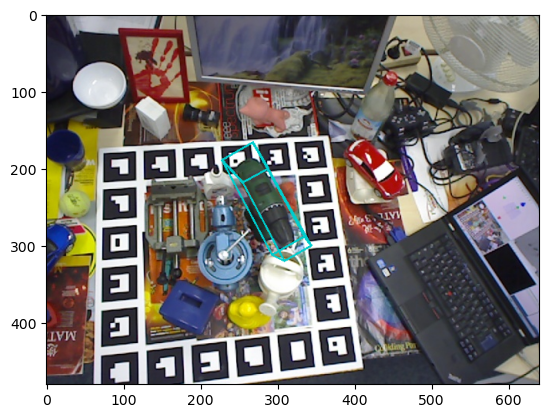

Pose estimation time: 0.5337564945220947
R_est: [[ 0.47830793  0.87311824 -0.09426588]
 [ 0.85129395 -0.48734197 -0.19441299]
 [-0.21568524  0.0127413  -0.97637981]]
t_est: [ -61.54668736   13.04705521 1018.02355952]
running k-means on cuda..


[running kmeans]: 3it [00:00, 88.17it/s, center_shift=0.000000, iteration=3, tol=0.000100]


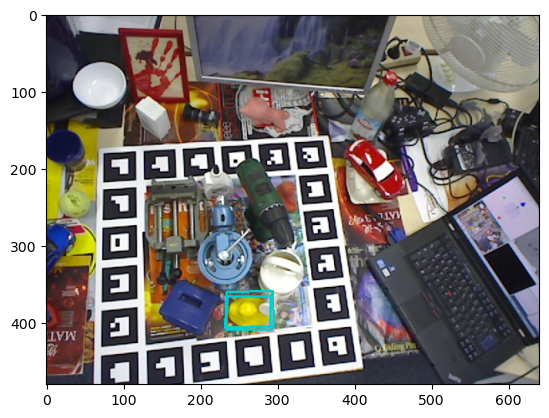

Pose estimation time: 0.31775808334350586
R_est: [[-0.9922878   0.02186165  0.12201223]
 [-0.0202978   0.94238018 -0.33392752]
 [-0.12228212 -0.33382878 -0.93466862]]
t_est: [-109.10739575  254.3975977  1018.4237265 ]
running k-means on cuda..


[running kmeans]: 2it [00:00, 91.83it/s, center_shift=0.000000, iteration=2, tol=0.000100]


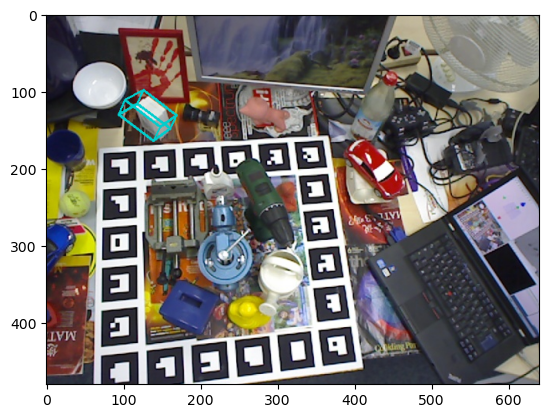

Pose estimation time: 0.3295159339904785
R_est: [[-0.78917299 -0.32376136  0.52190475]
 [-0.60818154  0.530344   -0.59063564]
 [-0.08556405 -0.78352653 -0.61543884]]
t_est: [-536.2790633  -309.40901891 1595.41248316]
running k-means on cuda..


[running kmeans]: 2it [00:00, 80.42it/s, center_shift=0.000000, iteration=2, tol=0.000100]


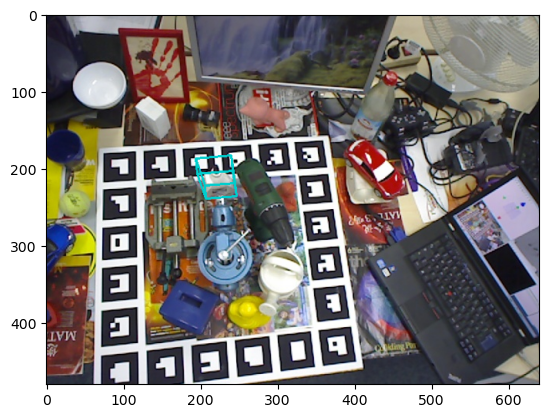

Pose estimation time: 0.2972090244293213
R_est: [[ 0.12793012  0.98868472  0.07833528]
 [ 0.94325338 -0.09688548 -0.31762599]
 [-0.30644242  0.11452395 -0.94497477]]
t_est: [-190.58798517  -52.65023706 1067.38412165]
running k-means on cuda..


[running kmeans]: 4it [00:00, 49.96it/s, center_shift=0.000000, iteration=4, tol=0.000100]


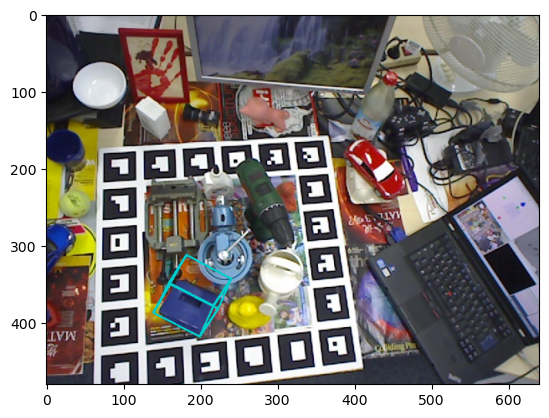

Pose estimation time: 0.5660791397094727
R_est: [[-0.48000805  0.86154525 -0.16532405]
 [ 0.70470687  0.49092012  0.51223595]
 [ 0.52247535  0.12937238 -0.84278247]]
t_est: [-220.85499675  201.90746719  939.04869433]


In [11]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '8'


for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_name = data_gt[img_id][obj_number]['obj_name']
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()

    R_est, t_est = pose_estimator.get_pose(img, obj_name, obj_id, mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")




In [1]:
import trimesh
from tools.ply_file_to_3d_coord_model import convert_unique


mesh_path = "/mnt/Littleboy/ZS6D/templates/linemod_desc/models/obj_000001.ply"

out_path = "obj_000001_xyz.ply"

convert_unique(mesh_path, out_path)


(39.819958, 40.709934, 56.63465, -1.8856587, -1.9103358, -10.750154)

In [18]:
from plyfile import PlyData, PlyElement

model_path = '/mnt/Littleboy/ZS6D/templates/ycbv_desc/models_xyz/obj_000010.ply'

model_path_working = '/mnt/Littleboy/ZS6D/templates/ycbv_desc/models_xyz_working/obj_000010.ply'

model_path_before = '/mnt/Littleboy/ZS6D/templates/ycbv/models/obj_000010.ply'

plydata_before = PlyData.read(model_path_before)

plydata_not_working = PlyData.read(model_path)

plydata_working = PlyData.read(model_path_working)

In [19]:
plydata_before.elements[0].data

array([(-47.551, -60.295,   5.166, -5.22226  , -1.919974 ,  2.89706 , 0.896 , 0.1008),
       (-49.817,  -5.815,  -8.504, -5.452106 ,  0.9285001, -2.978487, 0.1156, 0.6888),
       (-30.09 , -85.954, -12.587, -0.1040842, -3.365586 , -4.786951, 0.3977, 0.8282),
       ...,
       (  9.81 ,  80.452,  11.273,  0.4151828,  0.9106925,  2.366138, 0.5008, 0.6881),
       (  7.996,  84.863,   9.165, -0.1622982,  2.499315 ,  2.925677, 0.4943, 0.7013),
       ( 10.651,  83.125,  10.057,  0.4254326,  0.7842768,  1.947044, 0.6062, 0.5532)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('nx', '<f4'), ('ny', '<f4'), ('nz', '<f4'), ('texture_u', '<f4'), ('texture_v', '<f4')])

In [20]:
plydata_working.elements[0].data

memmap([(-47.551, -60.295,   5.166,  71,  36, 167, 255),
        (-49.817,  -5.815,  -8.504,  67, 104,  77, 255),
        (-30.09 , -85.954, -12.587, 103,   4,  50, 255), ...,
        (  9.81 ,  80.452,  11.273, 174, 212, 208, 255),
        (  7.996,  84.863,   9.165, 171, 218, 194, 255),
        ( 10.651,  83.125,  10.057, 176, 216, 200, 255)],
       dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('alpha', 'u1')])

In [25]:
plydata_not_working.elements[0].data

array([(-47.551, -60.295,   5.166, -5.22226  , -1.919974 ,  2.89706 , 0.896 , 0.1008),
       (-49.817,  -5.815,  -8.504, -5.452106 ,  0.9285001, -2.978487, 0.1156, 0.6888),
       (-30.09 , -85.954, -12.587, -0.1040842, -3.365586 , -4.786951, 0.3977, 0.8282),
       ...,
       (  9.81 ,  80.452,  11.273,  0.4151828,  0.9106925,  2.366138, 0.5008, 0.6881),
       (  7.996,  84.863,   9.165, -0.1622982,  2.499315 ,  2.925677, 0.4943, 0.7013),
       ( 10.651,  83.125,  10.057,  0.4254326,  0.7842768,  1.947044, 0.6062, 0.5532)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('nx', '<f4'), ('ny', '<f4'), ('nz', '<f4'), ('texture_u', '<f4'), ('texture_v', '<f4')])

In [2]:
mesh = trimesh.load(out_path)

mesh.show()